In [53]:
import numpy as np
import pandas as pd
import torch
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3

In [54]:
customer_data = pd.read_csv('CustomerDemographics.csv')

In [55]:
customer_data

,Customer ID,Country
0,13085,United Kingdom
1,13078,United Kingdom
2,15362,United Kingdom
3,18102,United Kingdom
4,12682,France
5,18087,United Kingdom
6,13635,United Kingdom
7,14110,United Kingdom
8,12636,USA
9,17519,United Kingdom


In [56]:
product_data = pd.read_csv('ProductInfo.csv')

In [57]:
product_data

,StockCode,Description
0,85123A,WHITE HANGING HEART T-LIGHT HOLDER
1,71053,WHITE METAL LANTERN
2,84406B,CREAM CUPID HEARTS COAT HANGER
3,84029G,KNITTED UNION FLAG HOT WATER BOTTLE
4,84029E,RED WOOLLY HOTTIE WHITE HEART.
...,...,...
8813,22962,Mailout
8814,22734,amendment
8815,22962,NaN
8816,22960,NaN


In [58]:
product_data.shape

(8818, 2)

In [59]:
transactional_data_1 = pd.read_csv('Transactional_data_retail_01.csv')

In [60]:
transactional_data_1.shape

(525461, 6)

In [61]:
transactional_data_1

,Invoice,StockCode,Quantity,Price,Customer ID,InvoiceDate
0,489434,85048,12,6.95,13085.0,01 December 2021
1,489434,79323P,12,6.75,13085.0,01 December 2021
2,489434,79323W,12,6.75,13085.0,01 December 2021
3,489434,22041,48,2.10,13085.0,01 December 2021
4,489434,21232,24,1.25,13085.0,01 December 2021
...,...,...,...,...,...,...
525456,538171,22271,2,2.95,17530.0,09 December 2022
525457,538171,22750,1,3.75,17530.0,09 December 2022
525458,538171,22751,1,3.75,17530.0,09 December 2022
525459,538171,20970,2,3.75,17530.0,09 December 2022


In [62]:
transactional_data_2 = pd.read_csv('Transactional_data_retail_02.csv')

In [63]:
transactional_data_2.shape

(541910, 6)

In [64]:
transactional_data_2

,Invoice,StockCode,Quantity,Price,Customer ID,InvoiceDate
0,536365,85123A,6,2.55,17850.0,01-12-2022
1,536365,71053,6,3.39,17850.0,01-12-2022
2,536365,84406B,8,2.75,17850.0,01-12-2022
3,536365,84029G,6,3.39,17850.0,01-12-2022
4,536365,84029E,6,3.39,17850.0,01-12-2022
...,...,...,...,...,...,...
541905,581587,22899,6,2.10,12680.0,09-12-2023
541906,581587,23254,4,4.15,12680.0,09-12-2023
541907,581587,23255,4,4.15,12680.0,09-12-2023
541908,581587,22138,3,4.95,12680.0,09-12-2023


In [65]:
transactional_data_1[['StockCode','Price']]

,StockCode,Price
0,85048,6.95
1,79323P,6.75
2,79323W,6.75
3,22041,2.10
4,21232,1.25
...,...,...
525456,22271,2.95
525457,22750,3.75
525458,22751,3.75
525459,20970,3.75


In [66]:
transactional_data_2['Price']

0          2.55
1          3.39
2          2.75
3          3.39
4          3.39
          ...  
541905     2.10
541906     4.15
541907     4.15
541908     4.95
541909    18.00
Name: Price, Length: 541910, dtype: float64

In [67]:
transactional_data_2['StockCode'].is_unique

False

In [68]:
transactional_data_2['StockCode'].value_counts()

StockCode
85123A    2313
22423     2203
85099B    2159
47566     1727
20725     1639
          ... 
20738        1
62095B       1
72814        1
84967B       1
84546        1
Name: count, Length: 4070, dtype: int64

In [69]:
# duplicate combinations of 'StockCode' and 'InvoiceDate'
duplicates = transactional_data_2[transactional_data_2.duplicated(subset=['StockCode', 'InvoiceDate'], keep=False)]
print(duplicates)


       Invoice StockCode  Quantity  Price  Customer ID InvoiceDate
0       536365    85123A         6   2.55      17850.0  01-12-2022
1       536365     71053         6   3.39      17850.0  01-12-2022
2       536365    84406B         8   2.75      17850.0  01-12-2022
3       536365    84029G         6   3.39      17850.0  01-12-2022
4       536365    84029E         6   3.39      17850.0  01-12-2022
...        ...       ...       ...    ...          ...         ...
541902  581587     22629        12   1.95      12680.0  09-12-2023
541905  581587     22899         6   2.10      12680.0  09-12-2023
541907  581587     23255         4   4.15      12680.0  09-12-2023
541908  581587     22138         3   4.95      12680.0  09-12-2023
541909  581587      POST         1  18.00      12680.0  09-12-2023

[382956 rows x 6 columns]


In [70]:
# standardize date formats
def standardize_date(date_str):
    try: 
        return pd.to_datetime(date_str, format='%d %B %Y')
    except ValueError:
        try:   
            return pd.to_datetime(date_str, format='%d-%m-%Y')
        except ValueError:
            return pd.NaT

#  function to the date columns in both datasets
transactional_data_1['InvoiceDate'] = transactional_data_1['InvoiceDate'].apply(standardize_date)
transactional_data_2['InvoiceDate'] = transactional_data_2['InvoiceDate'].apply(standardize_date)

# rows with missiing value
invalid_dates_1 = transactional_data_1[transactional_data_1['InvoiceDate'].isna()]
invalid_dates_2 = transactional_data_2[transactional_data_2['InvoiceDate'].isna()]


if not invalid_dates_1.empty:
    print("Invalid dates in Transactional_data_retail_01:")
    print(invalid_dates_1.head())
if not invalid_dates_2.empty:
    print("Invalid dates in Transactional_data_retail_02:")
    print(invalid_dates_2.head())

transactional_data_1.dropna(subset=['InvoiceDate'], inplace=True)
transactional_data_2.dropna(subset=['InvoiceDate'], inplace=True)

# Concatenate both datasets
transactional_data = pd.concat([transactional_data_1, transactional_data_2], ignore_index=True)

In [71]:
transactional_data.shape

(1067371, 6)

In [72]:
transactional_data

,Invoice,StockCode,Quantity,Price,Customer ID,InvoiceDate
0,489434,85048,12,6.95,13085.0,2021-12-01
1,489434,79323P,12,6.75,13085.0,2021-12-01
2,489434,79323W,12,6.75,13085.0,2021-12-01
3,489434,22041,48,2.10,13085.0,2021-12-01
4,489434,21232,24,1.25,13085.0,2021-12-01
...,...,...,...,...,...,...
1067366,581587,22899,6,2.10,12680.0,2023-12-09
1067367,581587,23254,4,4.15,12680.0,2023-12-09
1067368,581587,23255,4,4.15,12680.0,2023-12-09
1067369,581587,22138,3,4.95,12680.0,2023-12-09


In [73]:
# Transactional Data Summary
print("\nTransactional Data Info:")
transactional_data.info()

print("\nCustomer Data Info:")
customer_data.info()

print("\nProduct Data Info:")
product_data.info()

# Merge Transactional Data and  Product Data
merged_data = pd.merge(transactional_data, product_data, on='StockCode', how='left')


merged_data = pd.merge(merged_data, customer_data, on='Customer ID', how='left')

# Summary Statistics 
transaction_summary = merged_data.groupby('StockCode')['Quantity'].agg(['sum', 'mean', 'count']).reset_index()
transaction_summary.columns = ['StockCode', 'Total_Quantity_Sold', 'Average_Quantity', 'Transaction_Count']
print("\nTransaction Summary for each StockCode:")
print(transaction_summary.head())



Transactional Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 6 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   Invoice      1067371 non-null  object        
 1   StockCode    1067371 non-null  object        
 2   Quantity     1067371 non-null  int64         
 3   Price        1067371 non-null  float64       
 4   Customer ID  824364 non-null   float64       
 5   InvoiceDate  1067371 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(1), object(2)
memory usage: 48.9+ MB

Customer Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Customer ID  49 non-null     int64 
 1   Country      49 non-null     object
dtypes: int64(1), object(1)
memory usage: 916.0+ bytes

Product Data Info:
<class 'pa


Top 10 Stock Codes by Quantity Sold:
     StockCode  Total_Quantity_Sold  Average_Quantity  Transaction_Count
4645    85123A               480330         16.480700              29145
4615    85099B               382956         22.708491              16864
1549     22197               317452         31.134955              10196
2394     23084               245168         28.721649               8536
4310     84879               242115         27.265203               8880
1755     22423               206112          5.823689              35392
663      21181               201136         13.094792              15360
693      21212               190900         28.767330               6636
283      20713               168669         13.531408              12465
1321     21915               148564         33.918721               4380


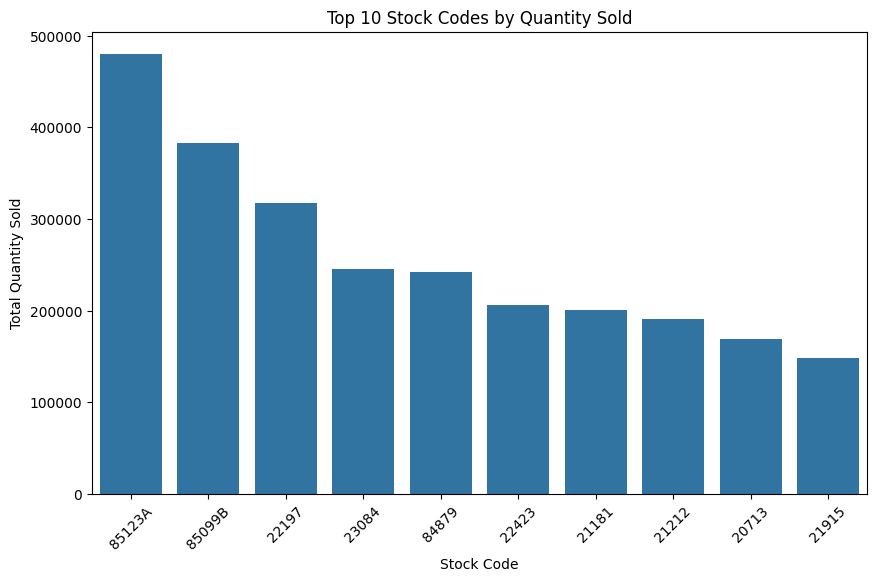

In [74]:
# Top 10 Products by Quantity Sold
top_10_quantity = transaction_summary.sort_values('Total_Quantity_Sold', ascending=False).head(10)
print("\nTop 10 Stock Codes by Quantity Sold:")
print(top_10_quantity)


plt.figure(figsize=(10,6))
sns.barplot(x='StockCode', y='Total_Quantity_Sold', data=top_10_quantity)
plt.title('Top 10 Stock Codes by Quantity Sold')
plt.xlabel('Stock Code')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation=45)
plt.show()



Top 10 Stock Codes by Revenue:
     StockCode  Total_Revenue
1755     22423     2622509.20
4645    85123A     1268600.10
4615    85099B      725114.04
5286       DOT      645294.94
2394     23084      534052.72
3340     47566      443845.50
663      21181      406239.36
4310     84879      394241.55
283      20713      368469.99
1829     22502      366445.50


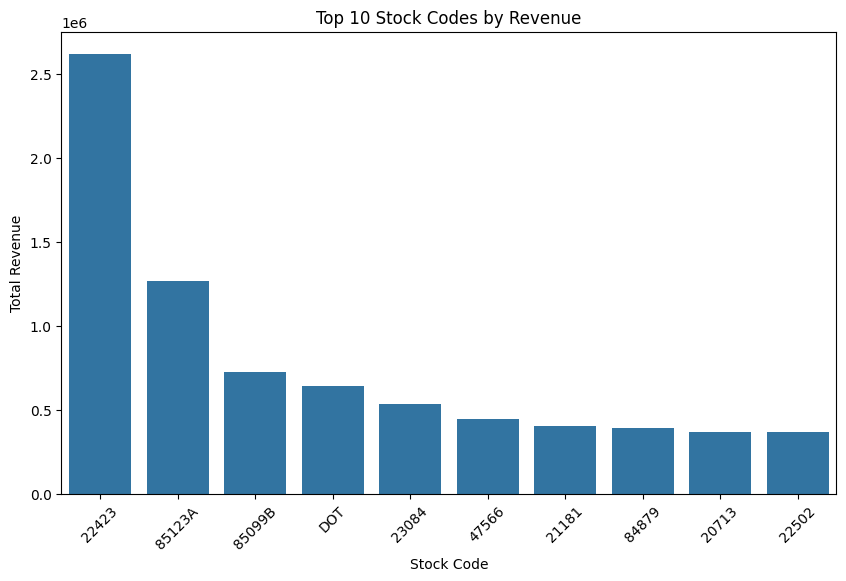

In [75]:
merged_data['Revenue'] = merged_data['Quantity'] * merged_data['Price']

# Top 10 Products by Revenue
revenue_summary = merged_data.groupby('StockCode')['Revenue'].agg(['sum']).reset_index()
revenue_summary.columns = ['StockCode', 'Total_Revenue']
top_10_revenue = revenue_summary.sort_values('Total_Revenue', ascending=False).head(10)

print("\nTop 10 Stock Codes by Revenue:")
print(top_10_revenue)


plt.figure(figsize=(10,6))
sns.barplot(x='StockCode', y='Total_Revenue', data=top_10_revenue)
plt.title('Top 10 Stock Codes by Revenue')
plt.xlabel('Stock Code')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.show()


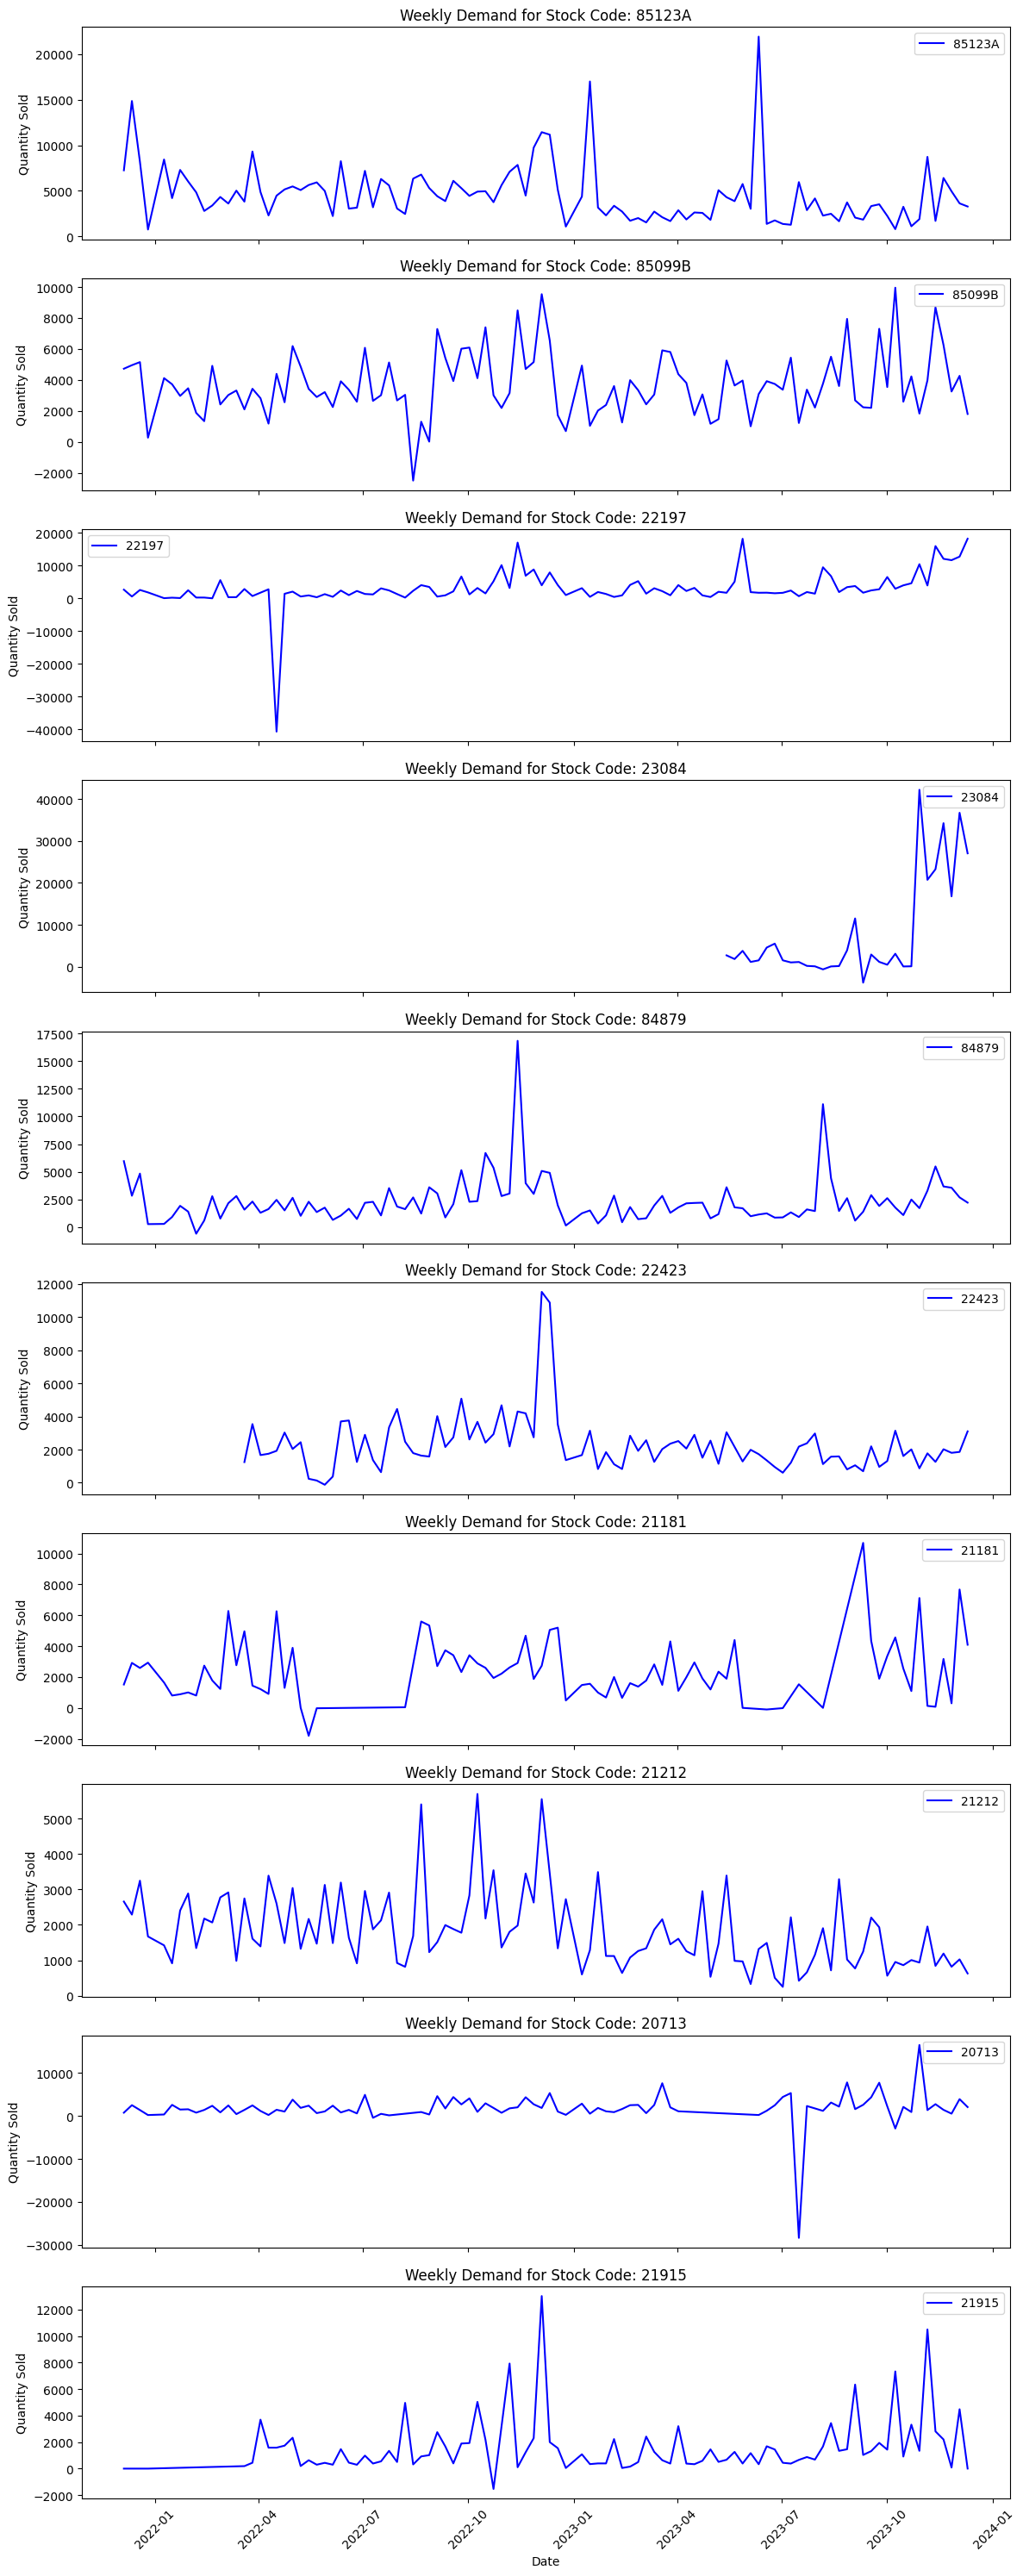

In [76]:
import matplotlib.pyplot as plt
top_10_stock_codes = top_10_quantity['StockCode'].tolist()
top_10_data = merged_data[merged_data['StockCode'].isin(top_10_stock_codes)]
weekly_demand = top_10_data.groupby([pd.Grouper(key='InvoiceDate', freq='W'), 'StockCode'])['Quantity'].sum().reset_index()
# subplots for each stock code
fig, axes = plt.subplots(len(top_10_stock_codes), 1, figsize=(12, len(top_10_stock_codes)*3), sharex=True)


for i, stock_code in enumerate(top_10_stock_codes):
    stock_data = weekly_demand[weekly_demand['StockCode'] == stock_code]
    axes[i].plot(stock_data['InvoiceDate'], stock_data['Quantity'], label=stock_code, color='blue')
    axes[i].set_title(f'Weekly Demand for Stock Code: {stock_code}')
    axes[i].set_ylabel('Quantity Sold')
    axes[i].legend()


plt.xlabel('Date')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



In [77]:
import sqlite3
import pandas as pd
from tabulate import tabulate


conn = sqlite3.connect(':memory:')

# Loading data SQLite
transactional_data.to_sql('transactions', conn, index=False, if_exists='replace')
customer_data.to_sql('customers', conn, index=False, if_exists='replace')
product_data.to_sql('products', conn, index=False, if_exists='replace')

# SQL query
query = """
SELECT
    t.StockCode, t.Quantity, t.Price, t.InvoiceDate, t."Customer ID",
    p.Description AS ProductDescription,
    c.Country
FROM
    transactions t
LEFT JOIN
    products p ON t.StockCode = p.StockCode
LEFT JOIN
    customers c ON t."Customer ID" = c."Customer ID"
"""
result = pd.read_sql_query(query, conn)

print("Joined Transactions Data:")
print(tabulate(result.head(), headers='keys', tablefmt='pretty', showindex=False))

Joined Transactions Data:
+-----------+----------+-------+---------------------+-------------+-------------------------------------+----------------+
| StockCode | Quantity | Price |     InvoiceDate     | Customer ID |         ProductDescription          |    Country     |
+-----------+----------+-------+---------------------+-------------+-------------------------------------+----------------+
|   85048   |    12    | 6.95  | 2021-12-01 00:00:00 |   13085.0   | 15CM CHRISTMAS GLASS BALL 20 LIGHTS | United Kingdom |
|  79323P   |    12    | 6.75  | 2021-12-01 00:00:00 |   13085.0   |                                     | United Kingdom |
|  79323P   |    12    | 6.75  | 2021-12-01 00:00:00 |   13085.0   |         PINK CHERRY LIGHTS          | United Kingdom |
|  79323P   |    12    | 6.75  | 2021-12-01 00:00:00 |   13085.0   |       Unsaleable, destroyed.        | United Kingdom |
|  79323W   |    12    | 6.75  | 2021-12-01 00:00:00 |   13085.0   |                                     |

In [78]:
query = """
SELECT
    StockCode, SUM(Quantity) AS Total_Quantity_Sold
FROM
    transactions
GROUP BY
    StockCode
ORDER BY
    Total_Quantity_Sold DESC
LIMIT 10;
"""
top_10_quantity_sql = pd.read_sql_query(query, conn)
print("Top 10 Products by Quantity Sold (SQL):")
print(tabulate(top_10_quantity_sql, headers='keys', tablefmt='pretty', showindex=False))

Top 10 Products by Quantity Sold (SQL):
+-----------+---------------------+
| StockCode | Total_Quantity_Sold |
+-----------+---------------------+
|   84077   |       108545        |
|  85123A   |        96066        |
|  85099B   |        95739        |
|   21212   |        95450        |
|   84879   |        80705        |
|   22197   |        79363        |
|   17003   |        70700        |
|   21977   |        56575        |
|   84991   |        54366        |
|   22492   |        45384        |
+-----------+---------------------+


In [79]:
query = """
SELECT
    t.StockCode, SUM(t.Quantity * t.Price) AS Total_Revenue
FROM
    transactions t
LEFT JOIN
    products p ON t.StockCode = p.StockCode
GROUP BY
    t.StockCode
ORDER BY
    Total_Revenue DESC
LIMIT 10;
"""
top_10_revenue_sql = pd.read_sql_query(query, conn)
print("Top 10 Products by Revenue (SQL):")
print(tabulate(top_10_revenue_sql, headers='keys', tablefmt='pretty', showindex=False))

Top 10 Products by Revenue (SQL):
+-----------+--------------------+
| StockCode |   Total_Revenue    |
+-----------+--------------------+
|   22423   | 2622509.1999999997 |
|  85123A   |     1268600.1      |
|  85099B   |     725114.04      |
|    DOT    |     645294.94      |
|   23084   |     534052.72      |
|   47566   |      443845.5      |
|   21181   | 406239.36000000004 |
|   84879   |     394241.55      |
|   20713   |     368469.99      |
|   22502   |      366445.5      |
+-----------+--------------------+


In [80]:
query = """
SELECT
    strftime('%Y-%W', t.InvoiceDate) AS YearWeek,
    t.StockCode,
    SUM(t.Quantity) AS Weekly_Quantity_Sold
FROM
    transactions t
GROUP BY
    YearWeek, t.StockCode
ORDER BY
    YearWeek;
"""
weekly_sales_sql = pd.read_sql_query(query, conn)
print("Weekly Sales by Product (SQL):")
print(tabulate(weekly_sales_sql.head(), headers='keys', tablefmt='pretty', showindex=False))

Weekly Sales by Product (SQL):
+----------+-----------+----------------------+
| YearWeek | StockCode | Weekly_Quantity_Sold |
+----------+-----------+----------------------+
| 2021-48  |   10002   |          92          |
| 2021-48  |  10002R   |          1           |
| 2021-48  |   10080   |          4           |
| 2021-48  |   10109   |          4           |
| 2021-48  |   10120   |         100          |
+----------+-----------+----------------------+


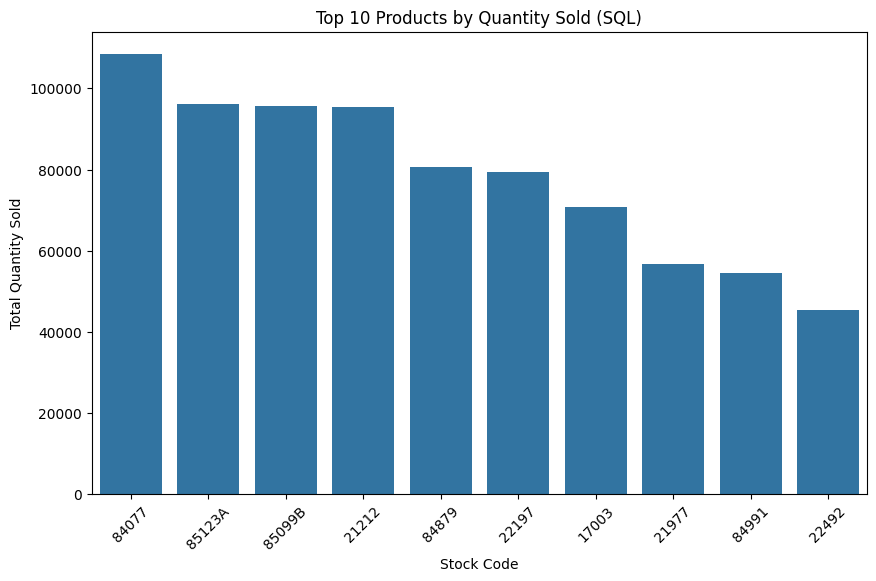

In [81]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualizing the Top 10 Products 
plt.figure(figsize=(10,6))
sns.barplot(x='StockCode', y='Total_Quantity_Sold', data=top_10_quantity_sql)
plt.title('Top 10 Products by Quantity Sold (SQL)')
plt.xlabel('Stock Code')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation=45)
plt.show()


Top 10 Stock Codes by Total Quantity Sold:
     StockCode  Quantity
3807     84077    108545
4645    85123A     96066
4615    85099B     95739
693      21212     95450
4310     84879     80705
1549     22197     79363
135      17003     70700
1359     21977     56575
4458     84991     54366
1819     22492     45384


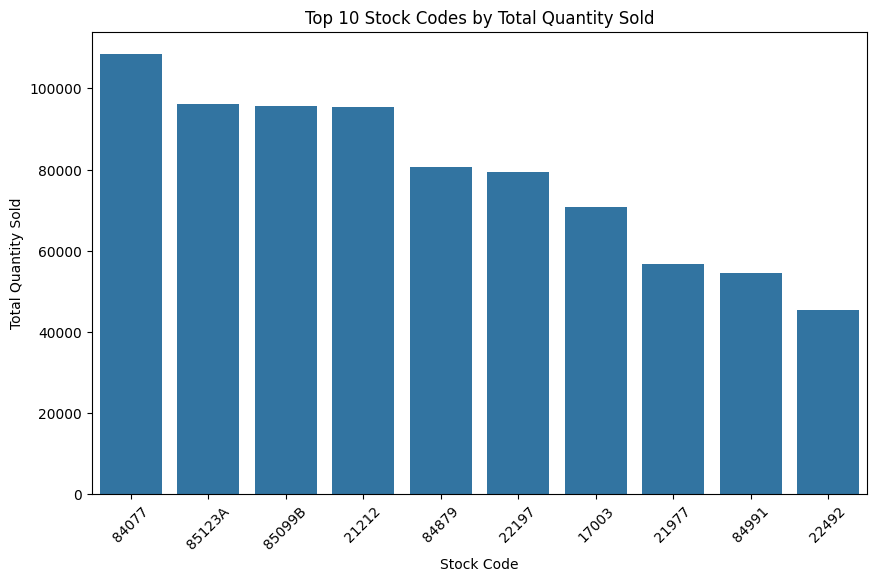

In [82]:
top_10_quantity = transactional_data.groupby('StockCode')['Quantity'].sum().reset_index()

top_10_quantity = top_10_quantity.sort_values(by='Quantity', ascending=False).head(10)

print("Top 10 Stock Codes by Total Quantity Sold:")
print(top_10_quantity)


plt.figure(figsize=(10,6))
sns.barplot(x='StockCode', y='Quantity', data=top_10_quantity)
plt.title('Top 10 Stock Codes by Total Quantity Sold')
plt.xlabel('Stock Code')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation=45)
plt.show()


Top 10 Stock Codes by Total Revenue:
     StockCode    Revenue
1755     22423  327813.65
5286       DOT  322647.47
4645    85123A  253720.02
4615    85099B  181278.51
3340     47566  147948.50
4310     84879  131413.85
1441     22086  121662.14
5290      POST  112341.00
3696     79321   84854.16
1549     22197   80300.07


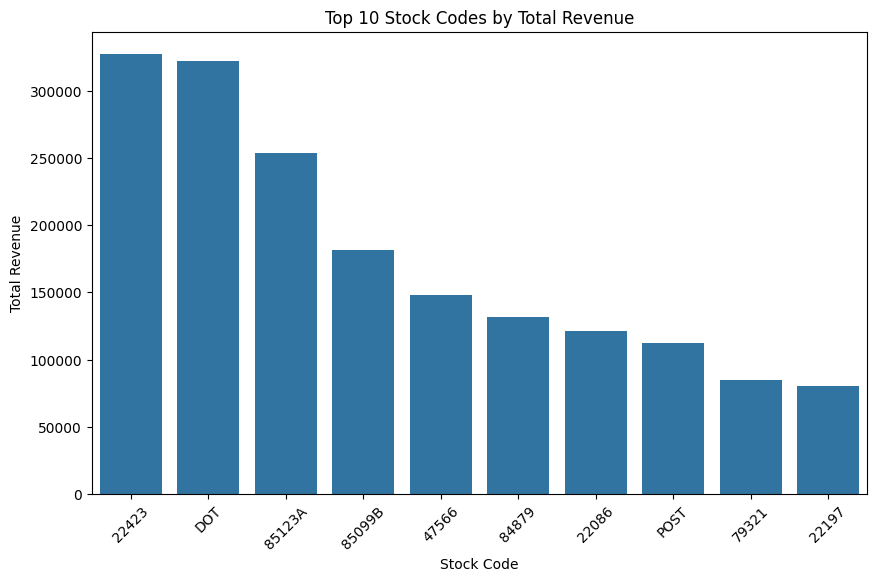

In [83]:
if 'Price' not in transactional_data.columns:
    # Merge transactional data with product data to get the price information
    merged_data = pd.merge(transactional_data, product_data, on='StockCode', how='left')
else:
    merged_data = transactional_data


merged_data['Revenue'] = merged_data['Quantity'] * merged_data['Price']


top_10_revenue = merged_data.groupby('StockCode')['Revenue'].sum().reset_index()

top_10_revenue = top_10_revenue.sort_values(by='Revenue', ascending=False).head(10)

print("Top 10 Stock Codes by Total Revenue:")
print(top_10_revenue)

plt.figure(figsize=(10,6))
sns.barplot(x='StockCode', y='Revenue', data=top_10_revenue)
plt.title('Top 10 Stock Codes by Total Revenue')
plt.xlabel('Stock Code')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.show()


In [84]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [85]:
merged_data_algo = pd.merge(transactional_data, customer_data, on='Customer ID', how='left')
merged_data_algorithm = pd.merge(merged_data_algo, product_data, on='StockCode', how='left')

In [86]:
merged_data_algo.shape

(1067371, 8)

In [87]:
merged_data_algorithm.shape

(2115559, 9)

In [88]:
merged_data_algorithm.head()

,Invoice,StockCode,Quantity,Price,Customer ID,InvoiceDate,Revenue,Country,Description
0,489434,85048,12,6.95,13085.0,2021-12-01,83.4,United Kingdom,15CM CHRISTMAS GLASS BALL 20 LIGHTS
1,489434,79323P,12,6.75,13085.0,2021-12-01,81.0,United Kingdom,PINK CHERRY LIGHTS
2,489434,79323P,12,6.75,13085.0,2021-12-01,81.0,United Kingdom,"Unsaleable, destroyed."
3,489434,79323P,12,6.75,13085.0,2021-12-01,81.0,United Kingdom,NaN
4,489434,79323W,12,6.75,13085.0,2021-12-01,81.0,United Kingdom,WHITE CHERRY LIGHTS


In [89]:
merged_data_algorithm['Description'] = merged_data_algorithm['Description'].fillna('').astype(str)

In [90]:
features = ['Quantity', 'Price', 'Country', 'Description'] 
X = merged_data_algorithm[features]
y = merged_data_algorithm['Quantity']

In [91]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from xgboost import XGBRegressor
from sklearn.feature_extraction.text import TfidfVectorizer

In [92]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [93]:
# Column Transformer 
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', ['Quantity', 'Price']),  # Pass through numeric columns as is
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), ['Country']),  # One-hot encoding for 'Country'
        ('tfidf', TfidfVectorizer(), 'Description')  # TF-IDF vectorization for 'Description'
    ]
)

In [94]:
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),  
    ('xgb_model', XGBRegressor(objective='reg:squarederror'))  
])

In [95]:
# GridSearchCV
param_grid = {
    'xgb_model__n_estimators': [100, 200],
    'xgb_model__learning_rate': [0.01, 0.1, 0.2],
    'xgb_model__max_depth': [3, 5, 7],
    'xgb_model__min_child_weight': [1, 2],
}

In [97]:
# GridSearchCV object
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid,
                           scoring='neg_mean_squared_error',
                           cv=3, verbose=1, n_jobs=-1)

grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 36 candidates, totalling 108 fits


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         'passthrough',
                                                                         ['Quantity',
                                                                          'Price']),
                                                                        ('cat',
                                                                         OneHotEncoder(drop='first',
                                                                                       handle_unknown='ignore'),
                                                                         ['Country']),
                                                                        ('tfidf',
                                                                         TfidfVectorizer(),
                                                                         'Description')])),
                                       ('xgb_model',
                                        XGBRegressor(base_score=None,
                                                     booster=None,
                                                     callbacks=None,
                                                     colsample_bylevel=None,
                                                     colsa...
                                                     min_child_weight=None,
                                                     missing=nan,
                                                     monotone_constraints=None,
                                                     multi_strategy=None,
                                                     n_estimators=None,
                                                     n_jobs=None,
                                                     num_parallel_tree=None,
                                                     random_state=None, ...))]),
             n_jobs=-1,
             param_grid={'xgb_model__learning_rate': [0.01, 0.1, 0.2],
                         'xgb_model__max_depth': [3, 5, 7],
                         'xgb_model__min_child_weight': [1, 2],
                         'xgb_model__n_estimators': [100, 200]},
             scoring='neg_mean_squared_error', verbose=1)

In [98]:
# best parameters and best estimator
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print(f"Best Hyperparameters: {best_params}")

Best Hyperparameters: {'xgb_model__learning_rate': 0.1, 'xgb_model__max_depth': 3, 'xgb_model__min_child_weight': 1, 'xgb_model__n_estimators': 100}


In [99]:
X_test

,Quantity,Price,Country,Description
1168919,1,3.36,NaN,LARGE HEART MEASURING SPOONS
39911,2,4.30,NaN,SPRING FLOWER CHOPSTICKS SET/5
1297788,1,5.79,NaN,
66232,2,1.70,NaN,PINK FAIRY CAKE COASTER
1411934,1,1.63,NaN,PLACE SETTING WHITE HEART
...,...,...,...,...
1798784,12,2.95,NaN,WHITE HANGING HEART T-LIGHT HOLDER
73754,6,2.55,NaN,SET/6 FROG PRINCE T-LIGHT CANDLES
331186,12,1.25,NaN,SCANDINAVIAN REDS RIBBONS
185013,12,0.42,NaN,ELEPHANT BIRTHDAY CARD


In [100]:
# Prediction
y_pred = best_model.predict(X_test)

# Evaluatution 
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)

print(f'XGBoost RMSE: {rmse}')
print(f'XGBoost MAE: {mae}')

XGBoost RMSE: 68.52416980555022
XGBoost MAE: 3.6746756729437906


C:\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
